<a href="https://colab.research.google.com/github/shamim-reja23/Covid-19-Classification/blob/main/Covid_19_2nd_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')

The data has 5644 rows and 110 columns.

The total percentage of missing value is: 87.95148508472393%
Percentage of positive cases: 9.886605244507441%


<ipython-input-2-92fea9399993>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Percentage of positive cases: {data["SARS-Cov-2 exam result"].value_counts()[1]/data.shape[0]*100}%')


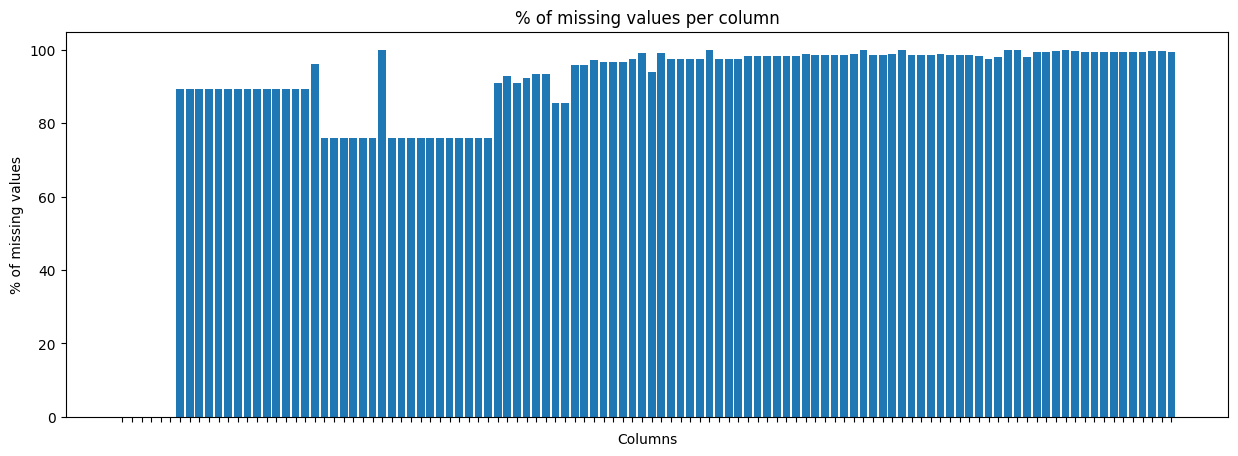

In [ ]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The total percentage of missing value is: {total_na_percentage}%')
print(f'Percentage of positive cases: {data["SARS-Cov-2 exam result"].value_counts()[1]/data.shape[0]*100}%')

fig, axes = plt.subplots(figsize=(15, 5))
axes.bar(data.columns, data.isna().sum()/data.shape[0]*100)
axes.set_title('% of missing values per column')
axes.set_xlabel('Columns')
axes.set_ylabel('% of missing values')
axes.set_xticklabels([])  # Hide x-axis labels
plt.show()

In [ ]:
# Remove all atributes with less than 5% of present data

data.drop_duplicates(inplace=True)
for col_name, col in data.items():
    if data[col_name].isna().sum()/data.shape[0] > 0.95:
        data.drop([col_name], axis=1, inplace=True)

In [ ]:
# Transforming categorical classes into numeric classes
# Considering missing data on categorical exams as negatives

bin_attributes = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1',
                'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
                'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E',
                'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Strepto A']

for col_name in bin_attributes:
    data[col_name].fillna('negative', inplace=True)

data.replace(to_replace='not_detected', value=int(0), inplace=True)
data.replace(to_replace='detected', value=int(1), inplace=True)
data.replace(to_replace='negative', value=int(0), inplace=True)
data.replace(to_replace='positive', value=int(1), inplace=True)

<ipython-input-4-e18408fbda5d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col_name].fillna('negative', inplace=True)
<ipython-input-4-e18408fbda5d>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace='negative', value=int(0), inplace=True)
<ipython-input-4-e18408fbd

In [ ]:
# Remove unnecessary attributes

data.drop(['Patient ID', 'Influenza A, rapid test', 'Influenza B, rapid test'], axis=1, inplace=True)

In [ ]:
data.drop(['Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Patient addmited to regular ward (1=yes, 0=no)'], axis=1, inplace=True)

In [ ]:
# Cut all the rows that lack more than 80% of data

for row_index, row in data.iterrows():
    if row.isna().sum()/data.shape[1] > 0.20:
        data.drop([row_index], inplace=True)
data.reset_index(inplace=True, drop=True)

# Fill the missing data

data.loc[data['SARS-Cov-2 exam result'] == 1] = data[data['SARS-Cov-2 exam result'] == 1].fillna(data[data['SARS-Cov-2 exam result'] == 1].mean())
data.loc[data['SARS-Cov-2 exam result'] == 0] = data[data['SARS-Cov-2 exam result'] == 0].fillna(data[data['SARS-Cov-2 exam result'] == 0].mean())


<ipython-input-7-aa7b7258c7c9>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[data['SARS-Cov-2 exam result'] == 1] = data[data['SARS-Cov-2 exam result'] == 1].fillna(data[data['SARS-Cov-2 exam result'] == 1].mean())
<ipython-input-7-aa7b7258c7c9>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[data['SARS-Cov-2 exam result'] == 0] = data[data['SARS-Cov-2 exam result'] == 0].fillna(data[data['SARS-Cov-2 exam result'] == 0].mean())


The percentage of missing values is: 0.0%


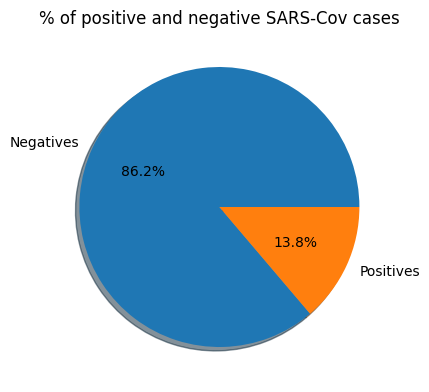

In [ ]:
to_be_ploted = ['Platelets', 'Leukocytes', 'Monocytes',  'Proteina C reativa mg/dL']

columns = 3
rows = 2
fig=plt.figure(figsize=(20,10))
x = fig.add_subplot(rows, columns, 1)
sizes = [data['SARS-Cov-2 exam result'].value_counts()[0], data['SARS-Cov-2 exam result'].value_counts()[1]]
labels = ['Negatives', 'Positives']
x.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
x.set_title('% of positive and negative SARS-Cov cases')


total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')

In [ ]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')


The data has 602 rows and 40 columns.

The percentage of missing values is: 0.0%


In [ ]:
print(data)

     Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                      17                       0    0.236515   -0.022340   
1                       1                       0   -1.571682   -0.774212   
2                       9                       0   -0.747693   -0.586244   
3                      11                       0    0.991838    0.792188   
4                       9                       0    0.190738   -0.147652   
..                    ...                     ...         ...         ...   
597                    19                       0    0.190738    0.165628   
598                    19                       0   -0.289922   -0.523588   
599                    15                       0    0.717175    1.105468   
600                    17                       0   -3.242548   -2.779203   
601                    19                       1    0.694287    0.541564   

     Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0   

In [ ]:
# Spliting target column

data_y_sars = data.iloc[:, 1]
data_x = data.drop(['SARS-Cov-2 exam result'], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for col_name, col in data_x.items():
    data_x[col_name] = scaler.fit_transform(data_x[col_name].values.reshape(-1,1))

sars_data = pd.concat([data_x, data_y_sars], axis=1)
admition_data = pd.concat([data_x], axis=1)

In [ ]:
# Using KFold cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=13)


In [ ]:
# Defining evaluation for model fit and scores and cross_validation for kfold and train-test division within each fold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def evaluate(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    recall = recall_score(y_test, y_predicted)
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    return acc, recall, f1

def cross_validation(kf, model, data):
    acc = []
    recall = []
    f1 = []
    for train_index, test_index in kf.split(data):
        x_train, x_test = data.iloc[train_index, :-1], data.iloc[test_index, :-1]
        y_train, y_test = data.iloc[train_index, -1], data.iloc[test_index, -1]
        acc_, recall_, f1_ = evaluate(model, x_train, x_test, y_train, y_test)
        acc.append(acc_)
        recall.append(recall_)
        f1.append(f1_)
    print(f'Model Params = {model.get_params()}')
    print(f'Accuracy = {np.mean(acc):.3f} +/- {np.std(acc):.3f}')
    print(f'Recall = {np.mean(recall):.3f} +/- {np.std(recall):.3f}')
    print(f'F1 = {np.mean(f1):.3f} +/- {np.std(f1):.3f}')
    print(f'Best Accuracy = {np.max(acc):.3f}')
    print(f'Best Recall = {np.max(recall):.3f}')
    print(f'Best F1 = {np.max(f1):.3f}')
    return np.mean(acc), np.mean(recall), np.mean(f1), np.max(acc), np.max(recall), np.max(f1)

In [ ]:
models = []
acc_results = []
recall_results = []
f1_results = []

In [ ]:
# Random Forest Classifier

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10)

#Traing model

acc_rfc, recall_rfc, f1_rfc, max_acc_rfc, max_recall_rfc, max_f1_rfc = cross_validation(kf, rfc_model, sars_data)
models.append('RFC')
acc_results.append(max_acc_rfc)
recall_results.append(max_recall_rfc)
f1_results.append(max_f1_rfc)


Model Params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy = 0.910 +/- 0.019
Recall = 0.400 +/- 0.041
F1 = 0.547 +/- 0.050
Best Accuracy = 0.942
Best Recall = 0.444
Best F1 = 0.600


In [ ]:
# Decision Tree Classifier

dtc_model = DecisionTreeClassifier(random_state=13)

#Training model

acc_dtc, recall_dtc, f1_dtc, max_acc_dtc, max_recall_dtc, max_f1_dtc = cross_validation(kf, dtc_model, sars_data)
models.append('DTC')
acc_results.append(max_acc_dtc)
recall_results.append(max_recall_dtc)
f1_results.append(max_f1_dtc)

Model Params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 13, 'splitter': 'best'}
Accuracy = 0.864 +/- 0.022
Recall = 0.468 +/- 0.111
F1 = 0.473 +/- 0.084
Best Accuracy = 0.892
Best Recall = 0.632
Best F1 = 0.615


In [ ]:
# Multi Layer Perception

mlp_model = MLPClassifier(hidden_layer_sizes=[50, 50, 50], activation='relu', solver ='adam', max_iter=10000000, learning_rate_init=0.1, alpha=0.02, learning_rate='adaptive')

#Training model

acc_mlp, recall_mlp, f1_mlp, max_acc_mlp, max_recall_mlp, max_f1_mlp = cross_validation(kf, mlp_model, sars_data)
models.append('SKL_MLP')
acc_results.append(max_acc_mlp)
recall_results.append(max_recall_mlp)
f1_results.append(max_f1_mlp)

Model Params = {'activation': 'relu', 'alpha': 0.02, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [50, 50, 50], 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 10000000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Accuracy = 0.887 +/- 0.033
Recall = 0.444 +/- 0.184
F1 = 0.506 +/- 0.069
Best Accuracy = 0.942
Best Recall = 0.810
Best F1 = 0.642


In [ ]:
# XGB Classifier

xgb_model = XGBClassifier(scale_pos_weight=(len(data_x) / sum(data_y_sars)),random_state=13)

#Training model

acc_xgb, recall_xgb, f1_xgb, max_acc_xgb, max_recall_xgb, max_f1_xgb = cross_validation(kf, xgb_model, sars_data)
models.append('XGBC')
acc_results.append(max_acc_xgb)
recall_results.append(max_recall_xgb)
f1_results.append(max_f1_xgb)

Model Params = {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 13, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 7.253012048192771, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Accuracy = 0.902 +/- 0.041
Recall = 0.627 +/- 0.142
F1 = 0.640 +/- 0.106
B

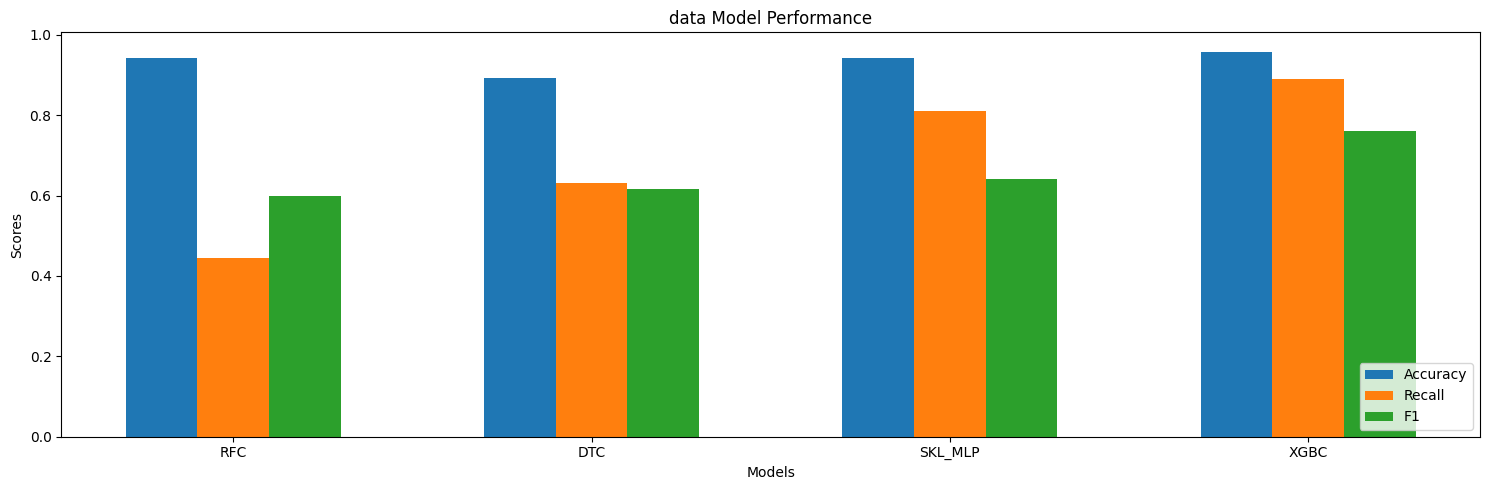

data                              
     Model  Accuracy    Recall        F1
0      RFC  0.941667  0.444444  0.600000
1      DTC  0.891667  0.631579  0.615385
2  SKL_MLP  0.941667  0.809524  0.641509
3     XGBC  0.958333  0.888889  0.761905

In [ ]:
# Analyzing the final results

results = pd.DataFrame({'Model': models, 'Accuracy': acc_results, 'Recall': recall_results, 'F1': f1_results})
final = pd.concat([results], axis=1, keys=['data'])


fig, ax1 = plt.subplots(figsize=(15,5))

bar_width = 0.2
bar1 = np.arange(len(results['Model']))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]

ax1.bar(bar1, results['Accuracy'], width=bar_width, label='Accuracy')
ax1.bar(bar2, results['Recall'],  width=bar_width, label='Recall')
ax1.bar(bar3, results['F1'],  width=bar_width, label='F1')
ax1.set_xticks([r + bar_width for r in range(len(results['Accuracy']))])
ax1.set_xticklabels(results['Model'])
ax1.set_title('data Model Performance')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.legend(loc='lower right')

plt.tight_layout()
plt.show()

final

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
  pickle.dump(xgb_model, file)

In [ ]:
# Display all column names in a structured format
for i, column in enumerate(data_x.columns, start=1):
    print(f"{i}: {column}")


1: Patient age quantile
2: Hematocrit
3: Hemoglobin
4: Platelets
5: Mean platelet volume 
6: Red blood Cells
7: Lymphocytes
8: Mean corpuscular hemoglobin concentration (MCHC)
9: Leukocytes
10: Basophils
11: Mean corpuscular hemoglobin (MCH)
12: Eosinophils
13: Mean corpuscular volume (MCV)
14: Monocytes
15: Red blood cell distribution width (RDW)
16: Respiratory Syncytial Virus
17: Influenza A
18: Influenza B
19: Parainfluenza 1
20: CoronavirusNL63
21: Rhinovirus/Enterovirus
22: Coronavirus HKU1
23: Parainfluenza 3
24: Chlamydophila pneumoniae
25: Adenovirus
26: Parainfluenza 4
27: Coronavirus229E
28: CoronavirusOC43
29: Inf A H1N1 2009
30: Bordetella pertussis
31: Metapneumovirus
32: Parainfluenza 2
33: Neutrophils
34: Urea
35: Proteina C reativa mg/dL
36: Creatinine
37: Potassium
38: Sodium
39: Strepto A


In [ ]:
# Print the first row
print(data.iloc[1])


Patient age quantile                                       1
SARS-Cov-2 exam result                                     0
Hematocrit                                         -1.571682
Hemoglobin                                         -0.774212
Platelets                                           1.429667
Mean platelet volume                               -1.672222
Red blood Cells                                    -0.850035
Lymphocytes                                        -0.005738
Mean corpuscular hemoglobin concentration (MCHC)    3.331071
Leukocytes                                           0.36455
Basophils                                          -0.223767
Mean corpuscular hemoglobin (MCH)                   0.178175
Eosinophils                                         1.018625
Mean corpuscular volume (MCV)                      -1.336024
Monocytes                                           0.068652
Red blood cell distribution width (RDW)            -0.978899
Respiratory Syncytial Vi